In [32]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [33]:
# 2D image
input_img = Input(shape=(28, 28, 1))

In [34]:
# encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [35]:
# decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [36]:
# autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [38]:
# load data
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [39]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s - loss: 0.2312 - acc: 0.7850 - val_loss: 0.1775 - val_acc: 0.7867
Epoch 2/50
60000/60000 [==============================] - 13s - loss: 0.1669 - acc: 0.7955 - val_loss: 0.1531 - val_acc: 0.8030
Epoch 3/50
60000/60000 [==============================] - 12s - loss: 0.1490 - acc: 0.8005 - val_loss: 0.1398 - val_acc: 0.7994
Epoch 4/50
60000/60000 [==============================] - 12s - loss: 0.1385 - acc: 0.8034 - val_loss: 0.1334 - val_acc: 0.8011
Epoch 5/50
60000/60000 [==============================] - 12s - loss: 0.1318 - acc: 0.8052 - val_loss: 0.1258 - val_acc: 0.8043
Epoch 6/50
60000/60000 [==============================] - 12s - loss: 0.1268 - acc: 0.8066 - val_loss: 0.1233 - val_acc: 0.8040
Epoch 7/50
60000/60000 [==============================] - 12s - loss: 0.1235 - acc: 0.8075 - val_loss: 0.1213 - val_acc: 0.8047
Epoch 8/50
60000/60000 [==============================

In [40]:
import matplotlib.pyplot as plt

In [41]:
decoded_imgs = autoencoder.predict(x_test)

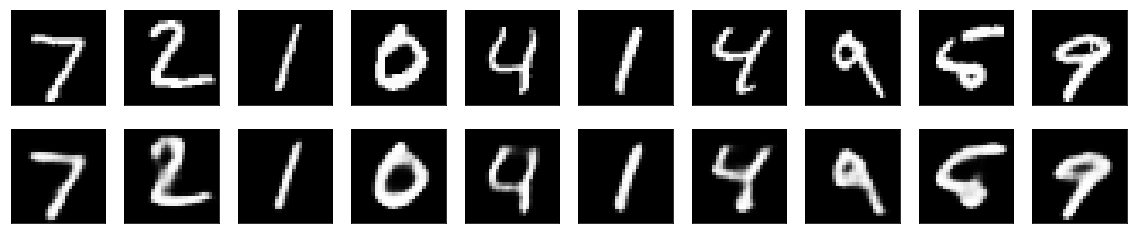

In [42]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [43]:
encoder = Model(input_img, encoded)

In [44]:
encoded_images = encoder.predict(x_test)

In [45]:
encoded.shape

TensorShape([Dimension(None), Dimension(4), Dimension(4), Dimension(8)])

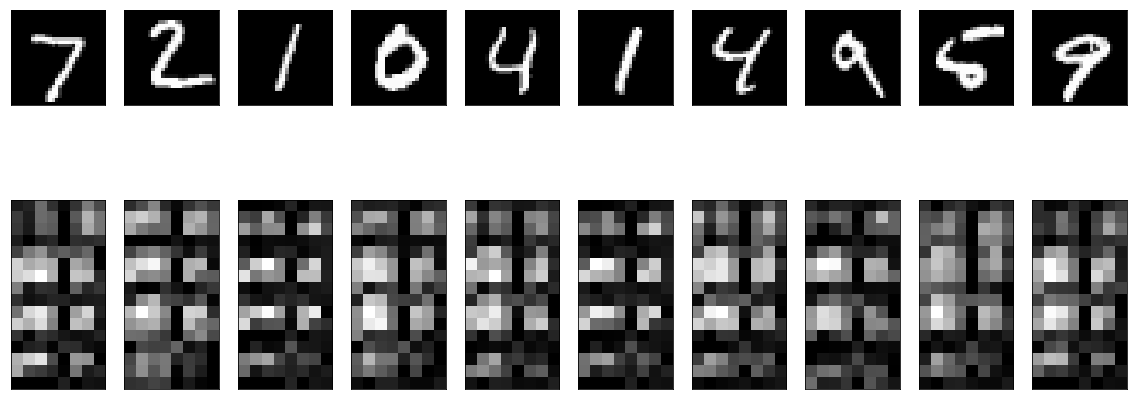

In [46]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(4*4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()